<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final Project - Programming for Data Science
    <div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
    @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 02 - Preprocessing
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sales_df=pd.read_csv('./../data/Auto Sales data.csv',delimiter=",")
sales_df.sample(n=5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2650,10197,35,93.35,11,3267.25,26/11/2018,3203,Shipped,Ships,99,S700_3962,Enaco Distributors,(93) 203 4555,"Rambla de Catalu¤a, 23",Barcelona,8022,Spain,Saavedra,Eduardo,Medium
2093,10291,26,83.79,3,2178.54,08/09/2019,2360,Shipped,Trucks and Buses,96,S32_1268,Scandinavian Gift Ideas,0695-34 6555,?kergatan 24,Boras,S-844 67,Sweden,Larsson,Maria,Small
641,10292,26,175.19,7,4554.94,08/09/2019,908,Shipped,Classic Cars,163,S18_2238,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Medium
397,10377,50,103.64,1,5182.00,09/02/2020,510,Shipped,Classic Cars,115,S12_4675,"Toys of Finland, Co.",90-224 8555,Keskuskatu 45,Helsinki,21240,Finland,Karttunen,Matti,Medium
2723,10129,32,64.97,8,2079.04,12/06/2018,3443,Shipped,Ships,54,S72_3212,"Stylish Desk Decors, Co.",(171) 555-0297,35 King George,London,WX3 6FW,UK,Brown,Ann,Small


In [3]:
n_rows=sales_df.shape[0]
n_cols=sales_df.shape[1]
n_rows, n_cols

(2747, 20)

Giá trị của mỗi cột:
- `ORDERNUMBER`: Định danh duy nhất của mỗi đơn hàng.
- `QUANTITYORDERED`: Số lượng sản phẩm được đặt cho mỗi đơn hàng.
- `PRICEEACH`: Giá của mỗi đơn vị sản phẩm.
- `ORDERLINENUMBER`: Số dòng của sản phẩm trong đơn hàng.
- `SALES`: Tổng giá trị bán hàng cho sản phẩm trong đơn hàng cụ thể (tính bẳng QUANTITYORDERED * PRICEEACH).
- `ORDERDATE`: Ngày đặt hàng.
- `DAYS_SINCE_LASTORDER`: Số ngày kể từ đơn hàng trước đó.
- `STATUS`: Trạng thái của đơn hàng (e.g., Shipped, Cancelled).
- `PRODUCTLINE`: Loại, danh mục của sản phẩm.
- `MSRP`: Giá bán lẻ khuyến nghị của sản phẩm.
- `PRODUCTCODE`: Mã sản phẩm.
- `CUSTOMERNAME`: Tên khách hàng đặt đơn.
- `PHONE`: Số điện thoại khách hàng.
- `ADDRESSLINE1`: Dòng địa chỉ đầu tiên của khách hàng.
- `CITY`: Thành phố nơi khách hàng ở.
- `POSTALCODE`: Mã bưu điện của địa chỉ khách hàng.
- `COUNTRY`: Quốc gia nơi khách hàng ở.
- `CONTACTLASTNAME`: Họ của người liên hệ cho đơn hàng.
- `CONTACTFIRSTNAME`: Tên của người liên hệ cho đơn hàng.
- `DEALSIZE`: Kích thước của giao dịch (e.g., Small, Medium).

Giá trị của mỗi hàng: Mỗi hàng thể hiện đại diện cho 1 đơn hàng cụ thể với chi tiết về sản phẩm, khách hàng, và thông tin đơn hàng

Sau khi tìm ra giá trị của các cột, các hàng trong dữ liệu, ta kiểm tra xem có hàng nào trùng lặp không

In [4]:
duplicated_rows = sales_df[sales_df.duplicated()]
len(duplicated_rows)


0

- Vậy là không có hàng nào bị trùng. Tiếp đó, chúng ta sẽ kiểm tra tỉ lệ thiếu hụt của các cột trong dữ liệu.

In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [6]:
missing_values = sales_df.isnull().sum()

# Calculate missing ratio for each column
missing_ratio = (missing_values / len(sales_df)) * 100
missing_ratio

ORDERNUMBER             0.0
QUANTITYORDERED         0.0
PRICEEACH               0.0
ORDERLINENUMBER         0.0
SALES                   0.0
ORDERDATE               0.0
DAYS_SINCE_LASTORDER    0.0
STATUS                  0.0
PRODUCTLINE             0.0
MSRP                    0.0
PRODUCTCODE             0.0
CUSTOMERNAME            0.0
PHONE                   0.0
ADDRESSLINE1            0.0
CITY                    0.0
POSTALCODE              0.0
COUNTRY                 0.0
CONTACTLASTNAME         0.0
CONTACTFIRSTNAME        0.0
DEALSIZE                0.0
dtype: float64

Từ việc quan sát và tính toán, ta nhận thấy không có cột nào có dữ liệu bi thiếu

Kiểm tra nếu có cột nào có cùng giá trị trong tất cả các ô và bỏ đi cột đó

In [7]:
for column in sales_df.columns:
    if sales_df[column].nunique() == 1:
        print("Are all values in '{}' the same".format(column))
        sales_df=sales_df.drop(column,axis=1)

- Ta có thể thấy rằng không có cột nào cần phải bỏ

- Ta có thể thấy rằng tên cột đều được viết hoa và viết liền, điều mà có thể gây ảnh hưởng tới khả năng đọc, vì vậy chúng ta sẽ viết lại tên cho các cột

In [8]:
def lower_case(dataframe):
    dataframe.columns = dataframe.columns.map(lambda x: x.lower())  
lower_case(sales_df)
sales_df.rename(columns= {'ordernumber': 'order_number','quantityordered': 'quantity_ordered','priceeach':'price_per_unit','orderlinenumber':'orderline_number',
'orderdate':'order_date','customername':'customer_name','contactlastname':'last_name','contactfirstname':'first_name','msrp':'retail_price','dealsize':'deal_size','addressline1':'address','productcode':'product_code'},inplace=True)
sales_df.columns

Index(['order_number', 'quantity_ordered', 'price_per_unit',
       'orderline_number', 'sales', 'order_date', 'days_since_lastorder',
       'status', 'productline', 'retail_price', 'product_code',
       'customer_name', 'phone', 'address', 'city', 'postalcode', 'country',
       'last_name', 'first_name', 'deal_size'],
      dtype='object')

## CATEGORICAL COLUMNS

- Chuyển đổi cột `order_date` thành dạng datetime 

In [9]:
#convert the data type of the orderdate
sales_df["order_date"] = pd.to_datetime(sales_df["order_date"],dayfirst = True)


- Một giá trị trong cột `order_number` là id của đơn hàng cụ thể, vì vậy, ta sẽ chuyển nó thành dạng object 

In [10]:
sales_df['order_number'] = sales_df['order_number'].astype('object')

In [11]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_number          2747 non-null   object        
 1   quantity_ordered      2747 non-null   int64         
 2   price_per_unit        2747 non-null   float64       
 3   orderline_number      2747 non-null   int64         
 4   sales                 2747 non-null   float64       
 5   order_date            2747 non-null   datetime64[ns]
 6   days_since_lastorder  2747 non-null   int64         
 7   status                2747 non-null   object        
 8   productline           2747 non-null   object        
 9   retail_price          2747 non-null   int64         
 10  product_code          2747 non-null   object        
 11  customer_name         2747 non-null   object        
 12  phone                 2747 non-null   object        
 13  address           

- Sau khi hoàn thành việc chuyển đổi, ta đếm các giá trị xuất hiện trong các cột dữ liệu dạng categorical

In [12]:
columns_to_count=['order_number', 'status','productline','product_code','customer_name','phone','address','city','country','last_name','first_name','deal_size']
df=sales_df[columns_to_count]
cate_profile={}
def valuecount(col):
    # Count the occurrences of each attribute in the column
    unique_attributes = df[col.name].value_counts().to_dict()
    cate_profile[col.name]= {"num_diff_vals": len(unique_attributes), "distribution": unique_attributes}
df.agg(valuecount)
cate_profile=pd.DataFrame(data=cate_profile,index=["num_diff_vals", "distribution"])

cate_profile

,order_number,status,productline,product_code,customer_name,phone,address,city,country,last_name,first_name,deal_size
num_diff_vals,298,6,7,109,89,88,89,71,19,76,72,3
distribution,"{10106: 18, 10165: 18, 10168: 18, 10316: 18, 1...","{'Shipped': 2541, 'Cancelled': 60, 'Resolved':...","{'Classic Cars': 949, 'Vintage Cars': 579, 'Mo...","{'S18_3232': 51, 'S32_2509': 28, 'S50_1392': 2...","{'Euro Shopping Channel': 259, 'Mini Gifts Dis...","{'(91) 555 94 44': 259, '4155551450': 180, '03...","{'C/ Moralzarzal, 86': 259, '5677 Strong St.':...","{'Madrid': 304, 'San Rafael': 180, 'NYC': 152,...","{'USA': 928, 'Spain': 342, 'France': 314, 'Aus...","{'Freyre': 259, 'Nelson': 204, 'Young': 115, '...","{'Diego': 259, 'Valarie': 257, 'Sue': 84, 'Mic...","{'Medium': 1349, 'Small': 1246, 'Large': 152}"


- Sau khi quan sát, ta thấy các cột `status`, `productline`, `deal_size` có những giá trị cụ thể và được lặp lại nhiều lần, vì vậy ta sẽ trực quan hóa chúng bằng pie chart

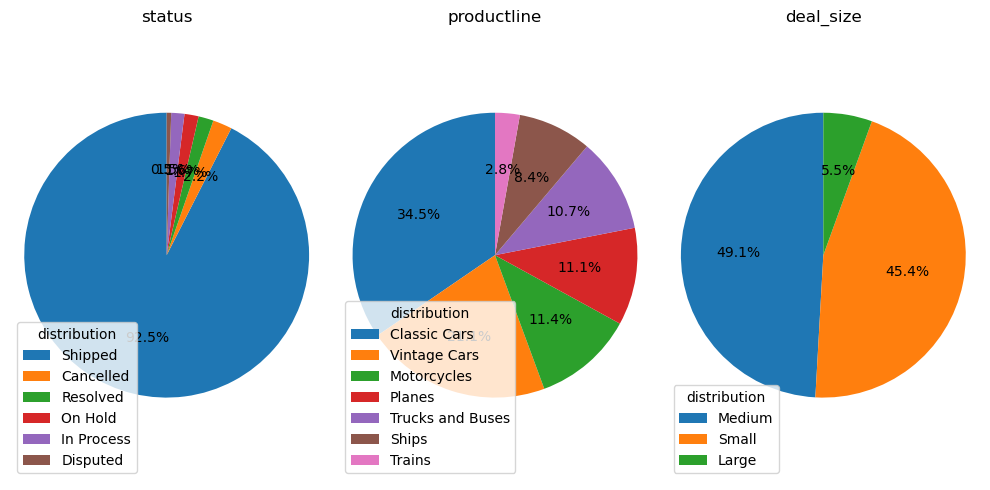

In [13]:
new_cate_profile=cate_profile[['status','productline','deal_size']]
fig, axes = plt.subplots(1,3, figsize=(10, 5))

# Flatten the axes to iterate over them
axes = axes.flatten()

# Plot pie charts for each column
for i, col in enumerate(new_cate_profile.columns):
    distribution = new_cate_profile[col]['distribution']
    labels = distribution.keys()
    sizes = distribution.values()

    axes[i].pie(sizes,autopct='%1.1f%%', startangle=90)
    axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    axes[i].set_title(col)
    axes[i].legend(distribution,title ="distribution",loc ="lower left")
plt.tight_layout()
plt.show()

- Qua trực quan hóa, có thể thấy ở cột `status`, giá trị chiếm tỉ lệ lớn nhất là "shipped", con ở cột `productline` các giá trị có vẻ đồng đều hơn. Trong khi đó, ở cột `deal_size` tỉ lệ cho 2 giá trị là "medium" và "small" gần bằng nhau còn giá trị "large" chiếm tỉ lệ ít 

### Có giá trị nào bất thường không?
- Không có cột nào có giá trị bất thường.

- Tiếp đó, ta dùng describe() để khám phá sâu hơn về dữ liệu.

In [14]:
sales_df.describe(include='object')

,order_number,status,productline,product_code,customer_name,phone,address,city,postalcode,country,last_name,first_name,deal_size
count,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747
unique,298,6,7,109,89,88,89,71,73,19,76,72,3
top,10106,Shipped,Classic Cars,S18_3232,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,USA,Freyre,Diego,Medium
freq,18,2541,949,51,259,259,259,304,259,928,259,259,1349


## NUMERIC COLUMNS

In [15]:
numeric_cols=['order_number','quantity_ordered','price_per_unit','orderline_number','sales','days_since_lastorder','retail_price']
numeric_col_profile = sales_df[numeric_cols].describe()[1:].round(1)
numeric_col_profile

,quantity_ordered,price_per_unit,orderline_number,sales,days_since_lastorder,retail_price
mean,35.1,101.1,6.5,3553.0,1757.1,100.7
std,9.8,42.0,4.2,1839.0,819.3,40.1
min,6.0,26.9,1.0,482.1,42.0,33.0
25%,27.0,68.7,3.0,2204.4,1077.0,68.0
50%,35.0,95.6,6.0,3184.8,1761.0,99.0
75%,43.0,127.1,9.0,4503.1,2436.5,124.0
max,97.0,252.9,18.0,14082.8,3562.0,214.0


- Sau khi hoàn thành việc tiền xử lí dữ liệu, ta lưu dữ liệu đã xử lý vào tệp csv mới để sang bước tiếp theo

In [16]:
sales_df.to_csv('./../data/Processed.csv')